## Word Clouds

In [47]:
#reading the twitter data
import pandas as pd 
df_tweets = pd.read_csv("Downloads/sts_gold_tweet.csv",delimiter=";")

In [48]:
df_tweets.head()

,id,polarity,tweet
0,1467933112,0,the angel is going to miss the athlete this we...
1,2323395086,0,It looks as though Shaq is getting traded to C...
2,1467968979,0,@clarianne APRIL 9TH ISN'T COMING SOON ENOUGH
3,1990283756,0,drinking a McDonalds coffee and not understand...
4,1988884918,0,So dissapointed Taylor Swift doesnt have a Twi...


In [49]:
df_tweets.shape

(2034, 3)

In [50]:
corpus_split = list(df_tweets['tweet'])

In [51]:
#helper function which concatenates all the data into a single corpus

def concatenate_list_data(list):
    result= ''
    for element in list:
        result += str(element)
    return result

In [52]:
corpus_twitter = concatenate_list_data(corpus_split)

In [53]:

# remove punctuation from each word
import string
table = str.maketrans('', '', string.punctuation)
stripped_twitter = [w.translate(table) for w in corpus_twitter]

#detokenizing all the words(we could call our concatenate_list_data function here)
from nltk.tokenize.treebank import TreebankWordDetokenizer
TreebankWordDetokenizer().detokenize(stripped_twitter)

#importing necessary NLTK packages

import nltk
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
nltk.download('stopwords')
nltk.download('punkt')

#setting stopwords to english
stop_words = set(stopwords.words('english'))

#Appending all the data in the list to a string
string_twitter=' '
string_twitter = string_twitter.join(stripped_twitter)

#tokenizing the string
word_tokens_twitter = word_tokenize(string_twitter)

[nltk_data] Downloading package stopwords to C:\Users\ABHA
[nltk_data]     SHRIVASTAVA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\ABHA
[nltk_data]     SHRIVASTAVA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [54]:
#removing all the stop words
filtered_corpus_twitter = [w for w in word_tokens_twitter if not w in stop_words]

In [55]:
#calculating the frequency of each word

wordfreq_twitter=[filtered_corpus_twitter.count(p) for p in filtered_corpus_twitter]
result_twitter = dict(zip(filtered_corpus_twitter,wordfreq_twitter))

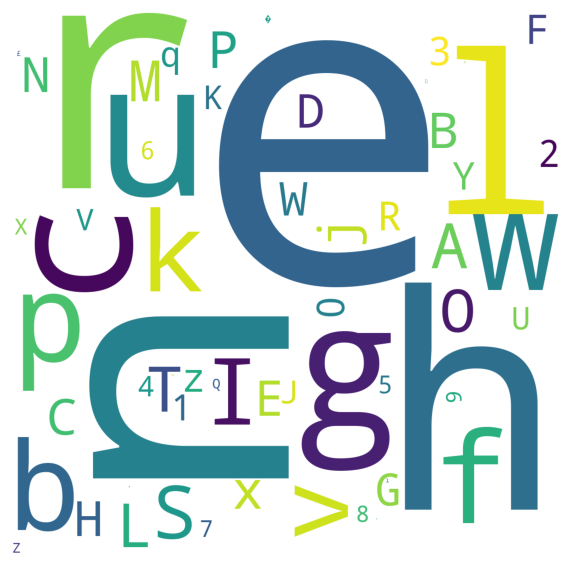

In [56]:
#finally lets plot the wordcloud 
from wordcloud import WordCloud
import matplotlib.pyplot as plt 

wordcloud = WordCloud(width = 1200, height = 1200, background_color="white",min_font_size =10).generate_from_frequencies(result_twitter)

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout() 
  
plt.show()

#### Custom Shaped Word Clouds

In [57]:
#custom word cloud
from PIL import Image
import numpy as np
import urllib
import requests


def generate_wordcloud(words, mask):
    wordcloud = WordCloud(width = 1200, height = 1200,background_color="white", min_font_size =10,mask=mask).generate_from_frequencies(words)    
    plt.figure(figsize=(10,8),facecolor = 'white', edgecolor='blue')
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()

#### Recreate the same word cloud in various shapes

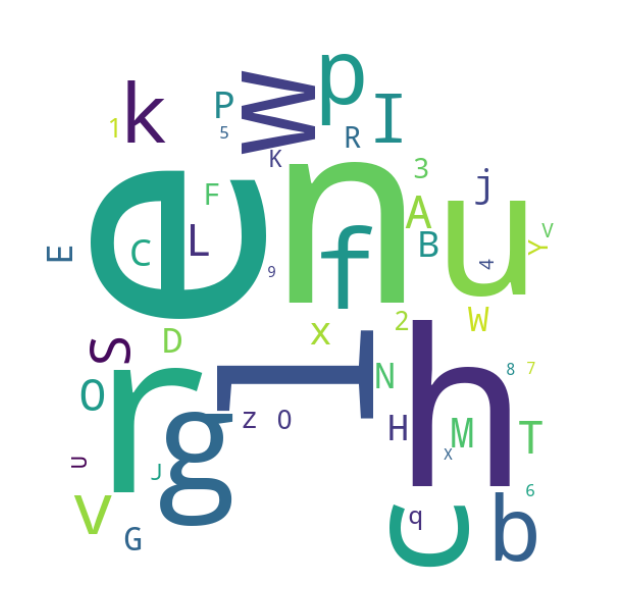

In [58]:
## House Shape
mask_house = np.array(Image.open(requests.get('http://www.clker.com/cliparts/O/i/x/Y/q/P/yellow-house-hi.png', stream=True).raw))
generate_wordcloud(result_twitter, mask_house)

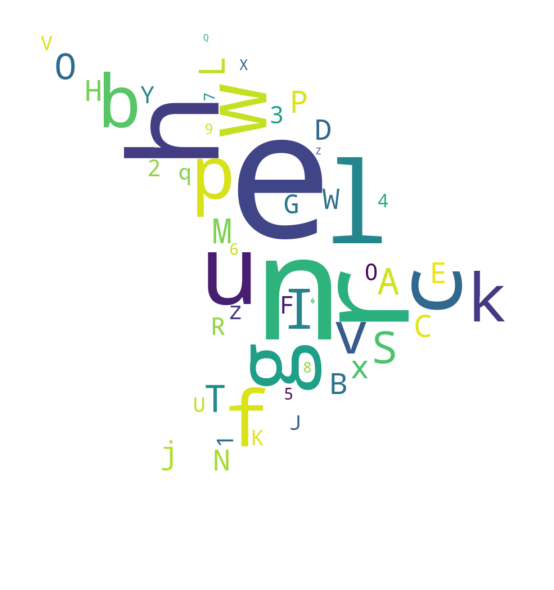

In [59]:
## Flying Bird Shape
mask_circle = np.array(Image.open(requests.get('https://res.cloudinary.com/dk-find-out/image/upload/q_80,w_960,f_auto/DCTM_Penguin_UK_DK_AL526630_wkmzns.jpg', stream=True).raw))
generate_wordcloud(result_twitter, mask_circle)